<a href="https://colab.research.google.com/github/hBar2013/DS_Unit_1_Portfolio_Project/blob/master/Cleaned_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SSP_IAM_V2_201811.csv to SSP_IAM_V2_201811 (1).csv


Medium blog post link: [link text](https://)https://medium.com/@ShadyLaine/if-you-were-conscious-and-had-access-to-media-of-any-sort-you-likely-recall-the-dire-assessment-of-e5852c5d1c71

In [0]:
import pandas as pd

In [0]:
ssp_file = 'SSP_IAM_V2_201811 (1).csv'
ssp_df = pd.read_csv(ssp_file)

In [0]:
ssp_df.head()

In [0]:
ssp_df['VARIABLE'].unique()

In [0]:
#dataframe containing summarized data for region == world
ssp_world = ssp_df[ssp_df['REGION'] == 'World']

In [0]:
#create new column with the baseline and rcp mitigation indicators
ssp_world['Mitigation'] = ssp_world['SCENARIO'].str.split('-').str[-1]

In [0]:
#create new column with the Shared Socioeconomic Pathway scenarios
ssp_world['SSP'] = ssp_world['SCENARIO'].str[:4]

In [0]:
#split into ssp specific dataframes
ssp1 = ssp_world[ssp_world['SSP'] == 'SSP1']
ssp2 = ssp_world[ssp_world['SSP'] == 'SSP2']
ssp3 = ssp_world[ssp_world['SSP'] == 'SSP3']
ssp4 = ssp_world[ssp_world['SSP'] == 'SSP4']
ssp5 = ssp_world[ssp_world['SSP'] == 'SSP5']

In [0]:
#global temperature change dfs by ssp
ssp1_temp = ssp1[ssp1['VARIABLE'] == 'Diagnostics|MAGICC6|Temperature|Global Mean']
ssp2_temp = ssp2[ssp2['VARIABLE'] == 'Diagnostics|MAGICC6|Temperature|Global Mean']
ssp3_temp = ssp3[ssp3['VARIABLE'] == 'Diagnostics|MAGICC6|Temperature|Global Mean']
ssp4_temp = ssp4[ssp4['VARIABLE'] == 'Diagnostics|MAGICC6|Temperature|Global Mean']
ssp5_temp = ssp5[ssp5['VARIABLE'] == 'Diagnostics|MAGICC6|Temperature|Global Mean']

In [0]:
#primary energy sources production output by ssps
ssp1_pe = ssp1[ssp1['VARIABLE'].str.contains('Primary Energy')]
ssp2_pe = ssp2[ssp2['VARIABLE'].str.contains('Primary Energy')]
ssp3_pe = ssp3[ssp3['VARIABLE'].str.contains('Primary Energy')]
ssp4_pe = ssp4[ssp4['VARIABLE'].str.contains('Primary Energy')]
ssp5_pe = ssp5[ssp5['VARIABLE'].str.contains('Primary Energy')]

In [0]:
#Prep data for plot of each SSP and their baseline and mitigation temperature change scenarios
# for range 2020 - 2100

#SSP1
val_temp1 = ssp1_temp.columns[7:-2]
val_temp1
temp1_melt = ssp1_temp.melt(id_vars=['SCENARIO', 'MODEL'], value_vars=val_temp1,
              var_name='year', value_name='temp')
temp1_melt['Mitigation'] = temp1_melt['SCENARIO'].str.split('-').str[-1]

#SSP2
val_temp2 = ssp2_temp.columns[7:-2]
val_temp2
temp2_melt = ssp2_temp.melt(id_vars=['SCENARIO', 'MODEL'], value_vars=val_temp2,
              var_name='year', value_name='temp')
temp2_melt['Mitigation'] = temp2_melt['SCENARIO'].str.split('-').str[-1]

#SSP3
val_temp3 = ssp3_temp.columns[7:-2]
val_temp3
temp3_melt = ssp3_temp.melt(id_vars=['SCENARIO', 'MODEL'], value_vars=val_temp3,
              var_name='year', value_name='temp')
temp3_melt['Mitigation'] = temp3_melt['SCENARIO'].str.split('-').str[-1]

#SSP4
val_temp4 = ssp4_temp.columns[7:-2]
val_temp4
temp4_melt = ssp4_temp.melt(id_vars=['SCENARIO', 'MODEL'], value_vars=val_temp4,
              var_name='year', value_name='temp')
temp4_melt['Mitigation'] = temp4_melt['SCENARIO'].str.split('-').str[-1]

#SSP5
val_temp5 = ssp5_temp.columns[7:-2]
val_temp5
temp5_melt = ssp5_temp.melt(id_vars=['SCENARIO', 'MODEL'], value_vars=val_temp5,
              var_name='year', value_name='temp')
temp5_melt['Mitigation'] = temp5_melt['SCENARIO'].str.split('-').str[-1]

In [27]:
ssp1_pe.MODEL.unique()

array(['AIM/CGE', 'GCAM4', 'IMAGE', 'MESSAGE-GLOBIOM', 'REMIND-MAGPIE',
       'WITCH-GLOBIOM'], dtype=object)

In [0]:
#Prep data for plot of baseline scenarios energy source production output 
# for range 2020 - 2100

#Target list of primary energy categories
energy_cats = ['Biomass', 'Fossil', 'Non-Biomass Renewables', 'Other']

#SSP1 Baseline using the marker model IMAGE
ssp1_pe_base = ssp1_pe[(ssp1_pe['MODEL'] ==  'IMAGE') 
                       & (ssp1_pe['Mitigation'] == 'Baseline')]

val_s1pe = ssp1_pe_base.columns[7:-2]

s1pe_base_melt = ssp1_pe_base.melt(id_vars=['VARIABLE'], value_vars=val_s1pe,
              var_name='year', value_name='primary_energy')

s1pe_base_melt['energy_cat'] = s1pe_base_melt['VARIABLE'].str.split('|').str[-1]

s1pe_base_melt = s1pe_base_melt.loc[s1pe_base_melt['energy_cat'].isin(energy_cats)]


#SSP2 Baseline using the marker model MESSAGE-GLOBIOM
ssp2_pe_base = ssp2_pe[(ssp2_pe['MODEL'] ==  'MESSAGE-GLOBIOM') 
                       & (ssp2_pe['Mitigation'] == 'Baseline')]

val_s2pe = ssp2_pe_base.columns[7:-2]

s2pe_base_melt = ssp2_pe_base.melt(id_vars=['VARIABLE'], value_vars=val_s2pe,
              var_name='year', value_name='primary_energy')

s2pe_base_melt['energy_cat'] = s2pe_base_melt['VARIABLE'].str.split('|').str[-1]

s2pe_base_melt = s2pe_base_melt.loc[s2pe_base_melt['energy_cat'].isin(energy_cats)]

#SSP3 Baseline using the marker model AIM/CGE
ssp3_pe_base = ssp3_pe[(ssp3_pe['MODEL'] ==  'AIM/CGE') 
                       & (ssp3_pe['Mitigation'] == 'Baseline')]

val_s3pe = ssp3_pe_base.columns[7:-2]

s3pe_base_melt = ssp3_pe_base.melt(id_vars=['VARIABLE'], value_vars=val_s3pe,
              var_name='year', value_name='primary_energy')

s3pe_base_melt['energy_cat'] = s3pe_base_melt['VARIABLE'].str.split('|').str[-1]

s3pe_base_melt = s3pe_base_melt.loc[s3pe_base_melt['energy_cat'].isin(energy_cats)]


#SSP4 Baseline using the marker model GCAM4
ssp4_pe_base = ssp4_pe[(ssp4_pe['MODEL'] ==  'GCAM4') 
                       & (ssp4_pe['Mitigation'] == 'Baseline')]
val_s4pe = ssp4_pe_base.columns[7:-2]

s4pe_base_melt = ssp4_pe_base.melt(id_vars=['VARIABLE'], value_vars=val_s4pe,
              var_name='year', value_name='primary_energy')

s4pe_base_melt['energy_cat'] = s4pe_base_melt['VARIABLE'].str.split('|').str[-1]


s4pe_base_melt = s4pe_base_melt.loc[s4pe_base_melt['energy_cat'].isin(energy_cats)]


#SSP5 Baseline using the marker model REMIND-MAGPIE
ssp5_pe_base = ssp5_pe[(ssp5_pe['MODEL'] ==  'REMIND-MAGPIE')
                       & (ssp5_pe['Mitigation'] == 'Baseline')]

val_s5pe = ssp5_pe_base.columns[7:-2]

s5pe_base_melt = ssp5_pe_base.melt(id_vars=['VARIABLE'], value_vars=val_s5pe,
              var_name='year', value_name='primary_energy')

s5pe_base_melt['energy_cat'] = s5pe_base_melt['VARIABLE'].str.split('|').str[-1]

s5pe_base_melt = s5pe_base_melt.loc[s5pe_base_melt['energy_cat'].isin(energy_cats)]

In [43]:
ssp1_pe.Mitigation.unique()

array(['19', '26', '34', '45', 'Baseline', '60'], dtype=object)

In [0]:
#Prep data for plot of mitigation scenarios energy source production output 
# for range 2020 - 2100

#SSP1 Mitigation Scenario for RCP 3.4 which is equivalent to a 2.1 - 2.3°C 
#increase in mean global temperature from pre-industrial baseline
ssp1_pe_mit = ssp1_pe[(ssp1_pe['Mitigation'] == '34')]

val_s1mit = ssp1_pe_mit.columns[7:-2]

s1pe_mit_melt = ssp1_pe_mit.melt(id_vars=['Mitigation', 'VARIABLE'], value_vars=val_s1mit,
              var_name='year', value_name='primary_energy')

s1pe_mit_melt['energy_cat'] = s1pe_mit_melt['VARIABLE'].str.split('|').str[-1]

s1pe_mit_melt = s1pe_mit_melt.loc[s1pe_mit_melt['energy_cat'].isin(energy_cats)]


#SSP2
ssp2_pe_mit = ssp2_pe[(ssp2_pe['Mitigation'] == '34')]
 
val_s2mit = ssp2_pe_mit.columns[7:-2]

s2pe_mit_melt = ssp2_pe_mit.melt(id_vars=['Mitigation', 'VARIABLE'], value_vars=val_s2mit,
              var_name='year', value_name='primary_energy')

s2pe_mit_melt['energy_cat'] = s2pe_mit_melt['VARIABLE'].str.split('|').str[-1]

s2pe_mit_melt = s2pe_mit_melt.loc[s2pe_mit_melt['energy_cat'].isin(energy_cats)]


#SSP3
ssp3_pe_mit = ssp3_pe[(ssp3_pe['Mitigation'] == '34')]
 
val_s3mit = ssp3_pe_mit.columns[7:-2]

s3pe_mit_melt = ssp3_pe_mit.melt(id_vars=['Mitigation', 'VARIABLE'], value_vars=val_s3mit,
              var_name='year', value_name='primary_energy')

s3pe_mit_melt['energy_cat'] = s3pe_mit_melt['VARIABLE'].str.split('|').str[-1]

s3pe_mit_melt = s3pe_mit_melt.loc[s3pe_mit_melt['energy_cat'].isin(energy_cats)]


#SSP4
ssp4_pe_mit = ssp4_pe[(ssp4_pe['Mitigation'] == '34')]
 
val_s4mit = ssp4_pe_mit.columns[7:-2]

s4pe_mit_melt = ssp4_pe_mit.melt(id_vars=['Mitigation', 'VARIABLE'], value_vars=val_s4mit,
              var_name='year', value_name='primary_energy')

s4pe_mit_melt['energy_cat'] = s4pe_mit_melt['VARIABLE'].str.split('|').str[-1]

s4pe_mit_melt = s4pe_mit_melt.loc[s4pe_mit_melt['energy_cat'].isin(energy_cats)]



#SSP5
ssp5_pe_mit = ssp5_pe[(ssp5_pe['Mitigation'] == '34')]
 
val_s5mit = ssp5_pe_mit.columns[7:-2]

s5pe_mit_melt = ssp5_pe_mit.melt(id_vars=['Mitigation', 'VARIABLE'], value_vars=val_s5mit,
              var_name='year', value_name='primary_energy')

s5pe_mit_melt['energy_cat'] = s5pe_mit_melt['VARIABLE'].str.split('|').str[-1]

s5pe_mit_melt = s5pe_mit_melt.loc[s5pe_mit_melt['energy_cat'].isin(energy_cats)]


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
sns.set_style('white')
sns.set_context('notebook')

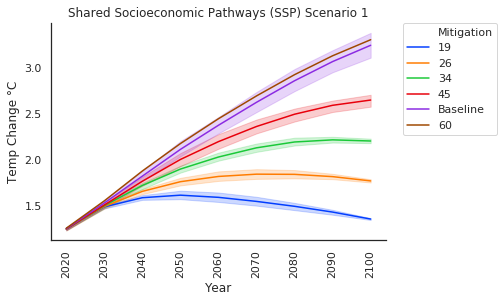

In [54]:
fig, ax = plt.subplots()
sns.lineplot(x='year', y='temp', hue='Mitigation', 
            palette="bright", data=temp1_melt)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'Shared Socioeconomic Pathways (SSP) Scenario 1'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Temp Change °C')
sns.despine()
plt.savefig("SSP1_all.png");

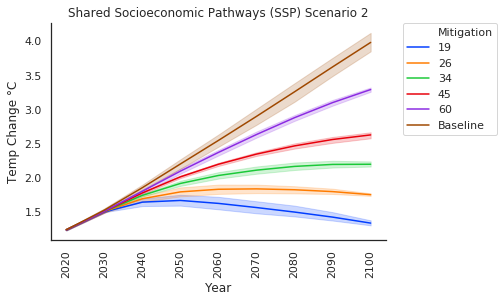

In [56]:
fig, ax = plt.subplots()
sns.lineplot(x='year', y='temp', hue='Mitigation', 
            palette="bright", data=temp2_melt)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'Shared Socioeconomic Pathways (SSP) Scenario 2'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Temp Change °C')
sns.despine()
plt.savefig("SSP2_all.png");

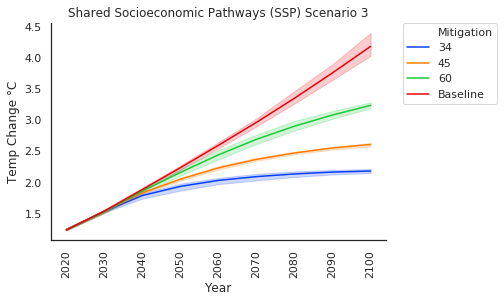

In [58]:
fig, ax = plt.subplots()
sns.lineplot(x='year', y='temp', hue='Mitigation', 
            palette="bright", data=temp3_melt)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'Shared Socioeconomic Pathways (SSP) Scenario 3'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Temp Change °C')
sns.despine() 
plt.savefig("SSP3_all.png");

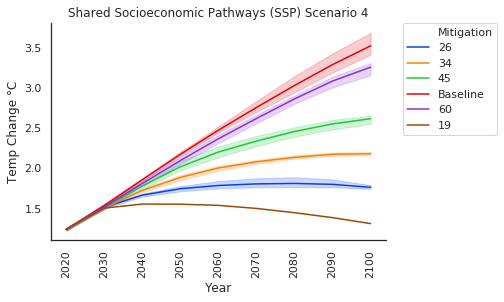

In [60]:
fig, ax = plt.subplots()
sns.lineplot(x='year', y='temp', hue='Mitigation', 
            palette="bright", data=temp4_melt)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'Shared Socioeconomic Pathways (SSP) Scenario 4'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Temp Change °C')
sns.despine()
plt.savefig("SSP4_all.png");

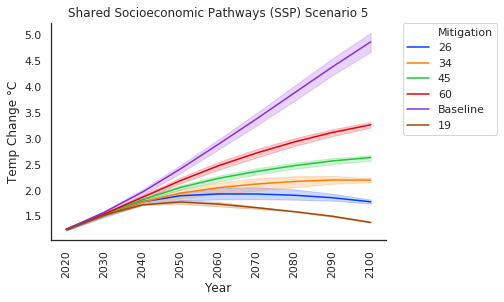

In [62]:
fig, ax = plt.subplots()
sns.lineplot(x='year', y='temp', hue='Mitigation', 
            palette="bright", data=temp5_melt)
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'Shared Socioeconomic Pathways (SSP) Scenario 5'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Temp Change °C')
sns.despine()
plt.savefig("SSP5_all.png");

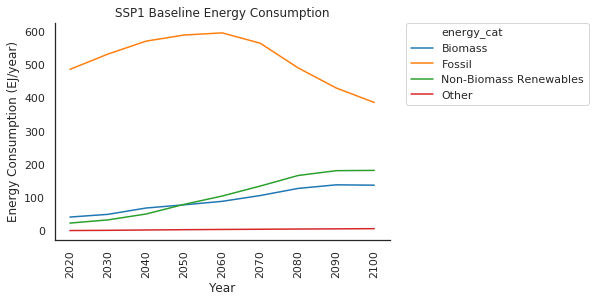

In [64]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s1pe_base_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP1 Baseline Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP1_base.png");

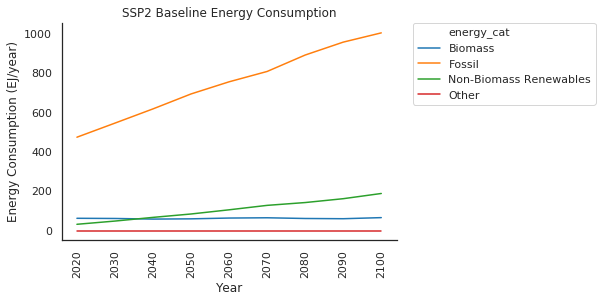

In [66]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s2pe_base_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP2 Baseline Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP2_base.png");

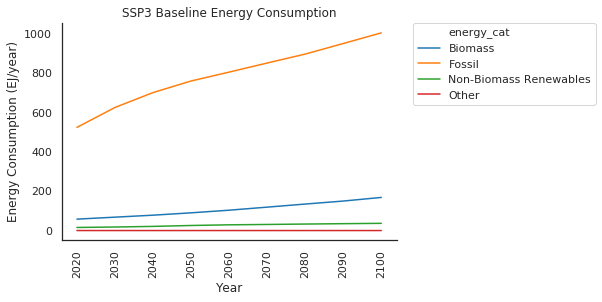

In [68]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s3pe_base_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP3 Baseline Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP3_base.png");

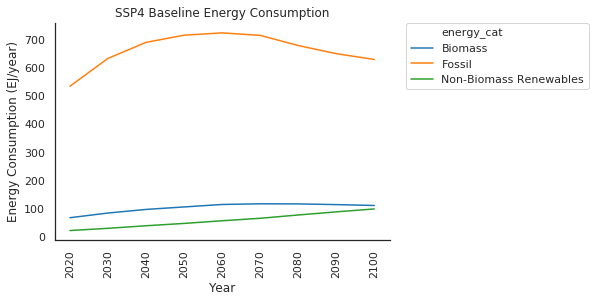

In [70]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s4pe_base_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP4 Baseline Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP4_base.png");

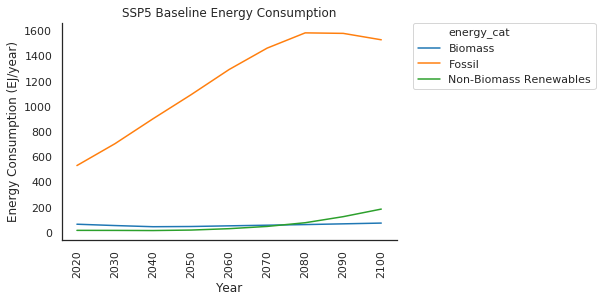

In [72]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s5pe_base_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP5 Baseline Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP5_base.png");

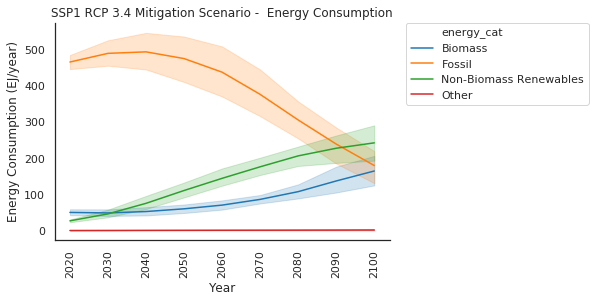

In [74]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s1pe_mit_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP1 RCP 3.4 Mitigation Scenario -  Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP1_rcp34.png");

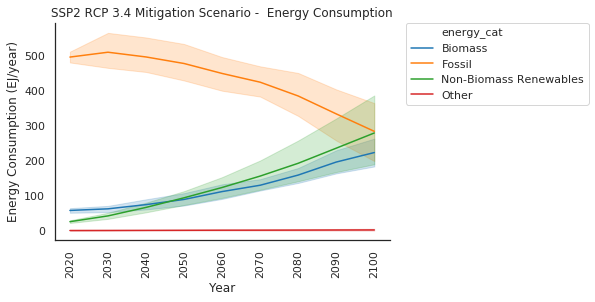

In [76]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s2pe_mit_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP2 RCP 3.4 Mitigation Scenario -  Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP2_rcp34.png");

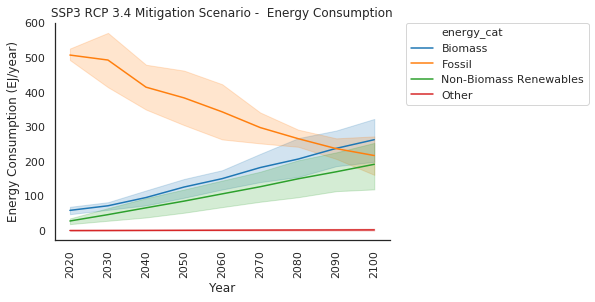

In [78]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s3pe_mit_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP3 RCP 3.4 Mitigation Scenario -  Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP3_rcp34.png");

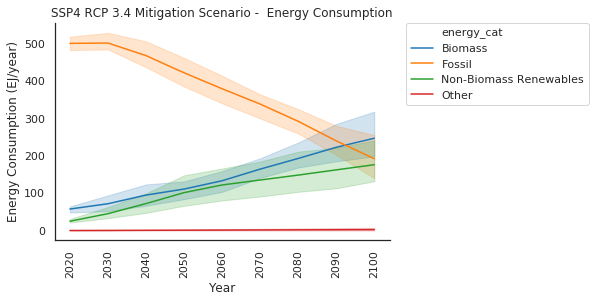

In [80]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s4pe_mit_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP4 RCP 3.4 Mitigation Scenario -  Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP4_rcp34.png");

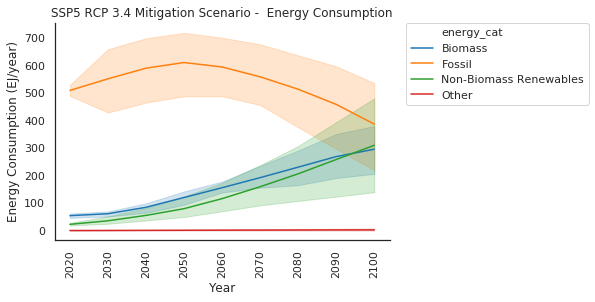

In [82]:
ax = sns.lineplot(x='year', y='primary_energy',
                      hue='energy_cat', data=s5pe_mit_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
figure_title = 'SSP5 RCP 3.4 Mitigation Scenario -  Energy Consumption'
plt.title(figure_title)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Energy Consumption (EJ/year)')
sns.despine()
plt.savefig("SSP5_rcp34.png");

In [0]:
from google.colab import files
files.download("SSP5_rcp34.png")  